In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [36]:
data = pd.read_csv('netflix_titles.csv')


### Data Cleaning

In [37]:
data.head(5)

,show_id,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,type
0,81193313,Chocolate,NaN,"Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...",South Korea,"November 30, 2019",2019,TV-14,1 Season,"International TV Shows, Korean TV Shows, Roman...",Brought together by meaningful meals in the pa...,TV Show
1,81197050,Guatemala: Heart of the Mayan World,"Luis Ara, Ignacio Jaunsolo",Christian Morales,NaN,"November 30, 2019",2019,TV-G,67 min,"Documentaries, International Movies","From Sierra de las Minas to Esquipulas, explor...",Movie
2,81213894,The Zoya Factor,Abhishek Sharma,"Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...",India,"November 30, 2019",2019,TV-14,135 min,"Comedies, Dramas, International Movies",A goofy copywriter unwittingly convinces the I...,Movie
3,81082007,Atlantics,Mati Diop,"Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...","France, Senegal, Belgium","November 29, 2019",2019,TV-14,106 min,"Dramas, Independent Movies, International Movies","Arranged to marry a rich man, young Ada is cru...",Movie
4,80213643,Chip and Potato,NaN,"Abigail Oliver, Andrea Libman, Briana Buckmast...","Canada, United Kingdom",NaN,2019,TV-Y,2 Seasons,Kids' TV,"Lovable pug Chip starts kindergarten, makes ne...",TV Show


In [38]:
data.shape

(5837, 12)

In [39]:
data.describe

<bound method NDFrame.describe of        show_id                                         title  \
0     81193313                                     Chocolate   
1     81197050           Guatemala: Heart of the Mayan World   
2     81213894                               The Zoya Factor   
3     81082007                                     Atlantics   
4     80213643                               Chip and Potato   
5     81172754                                  Crazy people   
6     81120982                                I Lost My Body   
7     81227195        Kalushi: The Story of Solomon Mahlangu   
8     70205672                              La Reina del Sur   
9     81172841                          Lagos Real Fake Life   
10    81172899                                        Payday   
11    81094391                          Sugar Rush Christmas   
12    81172908                            The Accidental Spy   
13    81152641                          The Charming Stepmom   
14    

In [40]:
data.columns

Index(['show_id', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'type'],
      dtype='object')

In [ ]:
mov=data.query("type=='Movie'")
mov['min']=mov['duration'].str.split(' ',expand=True)[0]
mov['min']=mov['min'].astype(int)
mov['hr']=mov['min']/60

## Top Tv Shows By no of Seasons 

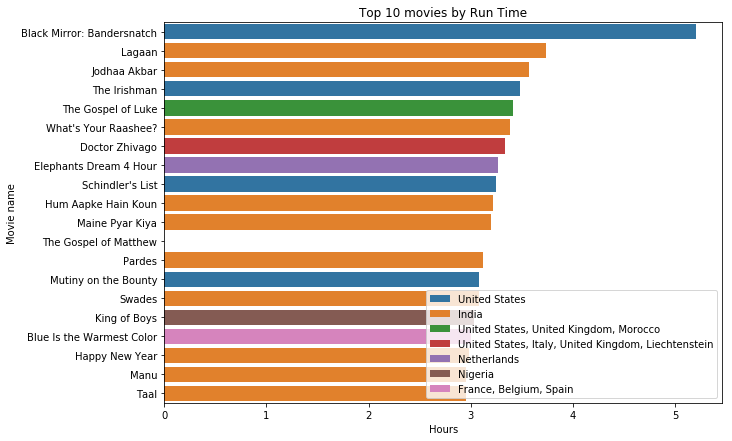

In [19]:
top20run=mov.sort_values(by='hr',ascending=False).head(20)
plt.figure(figsize=(10,7))
sns.barplot(data=top20run,y='title',x='hr',hue='country',dodge=False)
plt.legend(loc='lower right')
plt.title('Top 10 movies by Run Time')
plt.xlabel('Hours')
plt.ylabel('Movie name')
plt.show()

## Most popular director

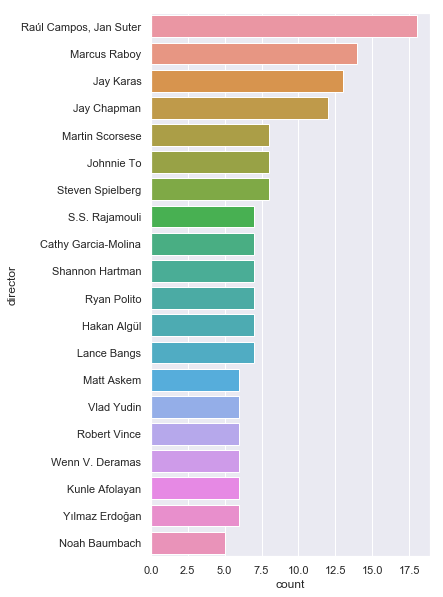

In [21]:
sns.set(style="darkgrid", palette="pastel", color_codes=True)
plt.figure(figsize=(5,10))
sns.countplot(y='director',data=data,order = data['director'].value_counts().head(20).index)
plt.show()